# Вариант 2


In [37]:
from scipy.stats import uniform, norm, chi2, poisson, binom
import matplotlib.pyplot as plt
import math
import collections
import pandas as pd

## Задача 1. 
Пусть $x_{1}, \ldots, x_{n} \sim U\left(\left[0 ; \theta_{0}\right]\right), \theta_{0}>0 .$ Известно, что ОМП для параметра $\theta_{0}$ равна
$$
\hat{\theta}_{n}=\max x_{i}
$$
- Исследуйте скорость сходимости оценки $\hat{\theta}_{n}$ к истинному значению параметра $\theta_{0}$.
- Выполняется ли неравенство Рао-Крамера? Покажите это с помощью моделирования.

_Зафиксируем какое-то значение параметра $\theta_0$. Пусть оно равно 1. А дальше будем строить выборки из соответствущего равномерного распределения размера от 1 до 200, наблюдая за тем, когда значения теоретического и оцененного параметра сойдутся._

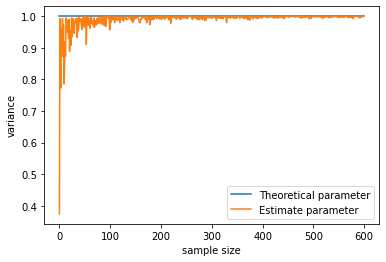

In [20]:
size = 600
theoretical = [1 for _ in range(size)]
estimate = []
for s in range(1, size):
    data = uniform.rvs(size=s)
    estimate.append(max(data))
plt.plot(theoretical, label='Theoretical parameter')
plt.plot(estimate, label='Estimate parameter')
plt.legend(loc="lower right")
plt.xlabel('sample size')
plt.ylabel('variance')
plt.show()

_Можно наблюдать, что начиная с размера выборки около 200 отклонение оцененного параметра от теоретического становится очень мало._

_Попробуем оценить скорость сходимости, для этого возьмем 1-x, и будем строить графики для $(1/х)^a, a \in [0.5, 0.75, 1, 1.25 1.5, 1.75, 2]$_

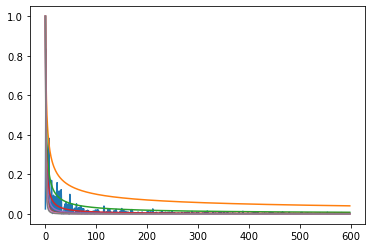

In [3]:
size = 600
estimate = []
for s in range(1, size):
    data = uniform.rvs(size=s)
    estimate.append(1 - max(data))
plt.plot(estimate, label='Estimate parameter')
for a in [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]:
    arr = []
    for s in range(1, size):
        arr.append((1/s) ** a)
    plt.plot(arr)
plt.show()

_Возьмем логарифмичесую шкалу, потому что сейчас ничего не видно:)_

In [4]:
from math import log

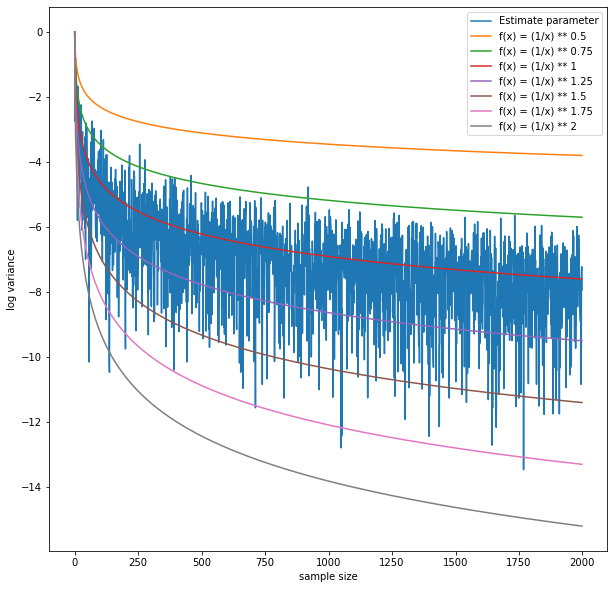

In [42]:
size = 2000
estimate = []
plt.figure(figsize=(10,10))
for s in range(1, size):
    data = uniform.rvs(size=s)
    estimate.append(log(1 - max(data)))
plt.plot(estimate, label='Estimate parameter')
for a in [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]:
    arr = []
    for s in range(1, size):
        arr.append(log((1/s) ** a))
    plt.plot(arr, label=f'f(x) = (1/x) ** {a}')
plt.legend(loc="upper right")
plt.xlabel('sample size')
plt.ylabel('log variance')
plt.show()

_Итак, видно, что функция 1/x лучше всего отражает скорость соходимости._

_Посчитаем, чему равно значение информационного количества Фишера в нашем случае._

_Исходная формула: $I_{n}(\theta)=\mathbb{E}_{\theta}\left(\frac{\partial \log L(\theta, X)}{\partial \theta}\right)^{2}$_

_В нашем случае: $L(\theta, X) = \frac{1}{\theta^n}\prod_{i=1}^n I_{[0, \theta]}(X_i)$_

_Тогда логарифм: $-n\log{\theta} + \sum_{i=1}^n I_{[0, \theta]}(X_i)$_

_Отсюда вторая производная: $I_{n}(\theta) = \frac{n}{\theta^2}$_

_Надо продемонстировать, что $D_\theta \hat{\theta}(x) \geq \frac{\theta^2}{n}$_

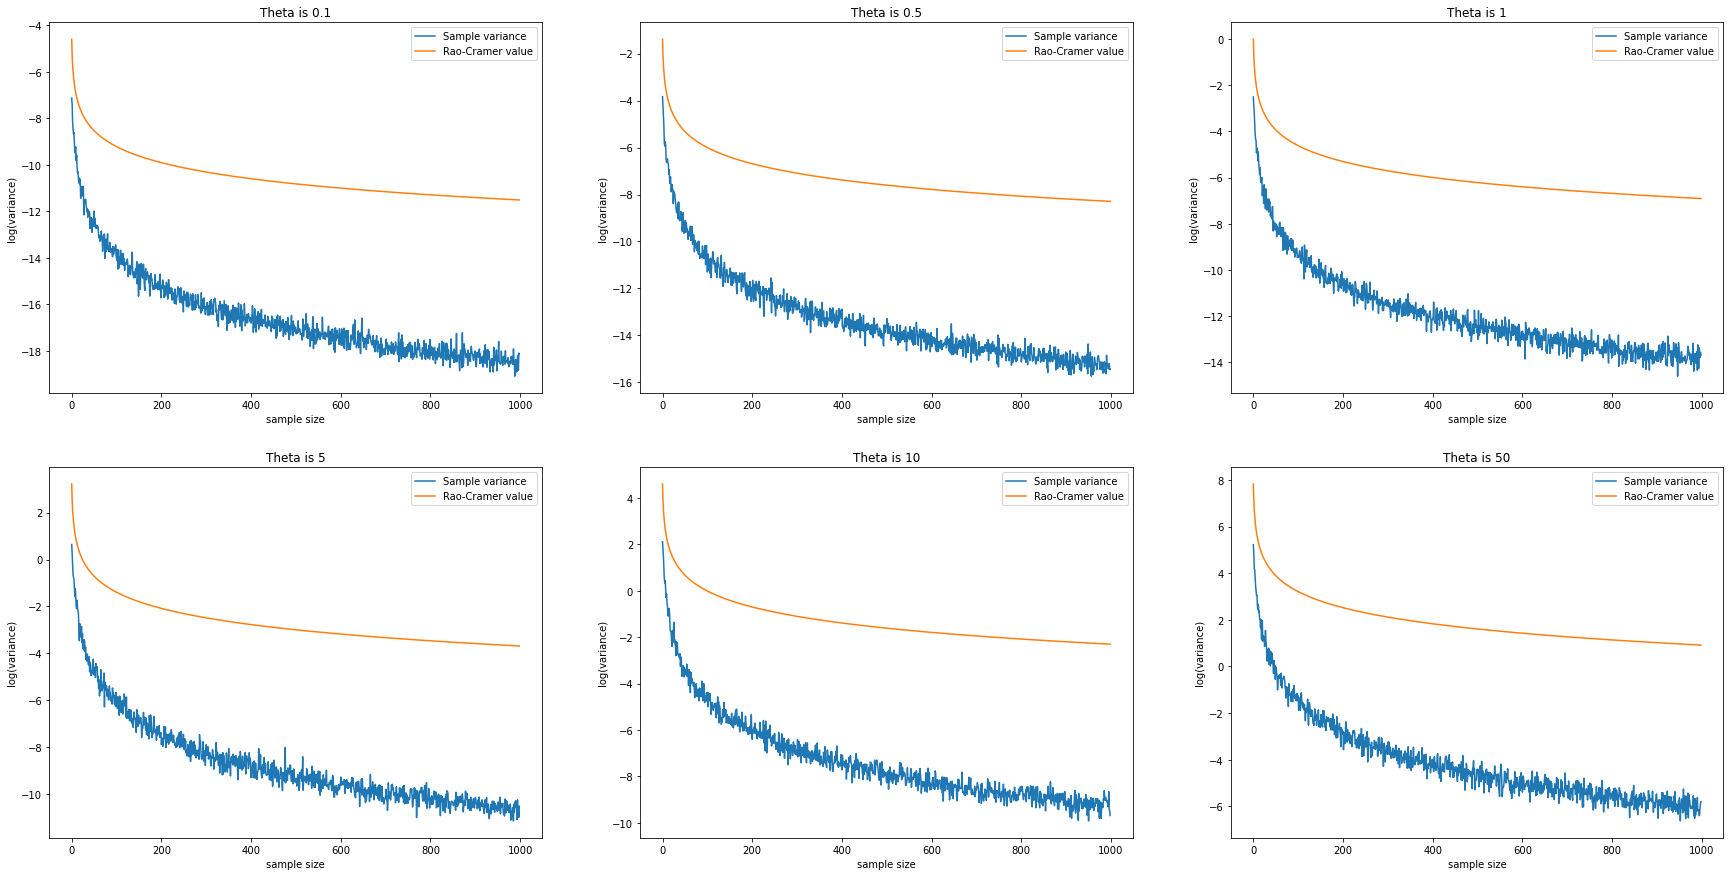

In [47]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30,15))
axis = [ax1, ax2, ax3, ax4, ax5, ax6]

for theta, ax in zip([0.1, 0.5, 1, 5, 10, 50], axis):
    var = []
    rao = []
    for n in range(1, 1000):
        cur_var = []
        for _ in range(100):
            data = uniform.rvs(size=n, scale=theta)
            cur_var.append(max(data))
        var.append(math.log(pd.Series(cur_var).var() * (100 - 1) / 100))
        rao.append(math.log(theta*theta/n))
    ax.set_title(f'Theta is {theta}') 
    ax.plot(var, label='Sample variance')
    ax.plot(rao, label='Rao-Cramer value')
    ax.legend(loc="upper right")
    ax.set_xlabel('sample size')
    ax.set_ylabel('log(variance)')
plt.show()

_Итак, продемонстрировали что неравенство Рао-Крамера выполняется при различных значениях $\theta$._

## Задача 2. 
Постройте доверительные интервалы для дисперсии в нормальной модели с неизвестным математическим ожиданием для разных объемов выборки.
- Покажите, что параметр $\sigma^{2}$ попадает в доверительный интервал с нужной вероятностью.
- Продемонстрируйте поведение доверительных интервалов как для малых объемов выборки, так и для больших.

_Известно, что доверительные интервалы для дисперсии в нормальной модели с неизвестным математическим ожиданием равны $\frac{(n-1) S^{2}}{\chi_{\frac{\alpha}{2}, n-1}^{2}}<\sigma^{2}<\frac{(n-1) S^{2}}{\chi_{1-\frac{\alpha}{2}, n-1}^{2}}$_

_Будем считать доверительные интервалы уровня $\alpha \in [0.1, 1]$, при этом каждый раз оценивая, попадает ли теоретическая дисперсия в нужный промежуток (будем много раз запускать и смотреть вероятность попадания)._

In [6]:
def get_confidence_interval(series, alpha):
    n = len(series)
    var = series.var()
    z1, z2 = chi2.interval(alpha, n-1)
    return (n-1)*var/z2, (n-1)*var/z1

Text(0, 0.5, 'probability of success')

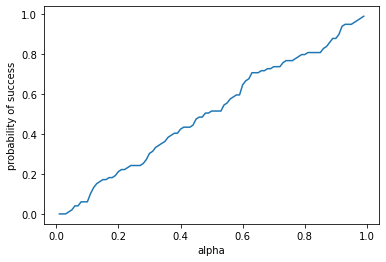

In [7]:
n = 1000
alphas = []
probas = []
for i in range(1, 100):
    alpha = i/100
    values = []
    for j in range(1, 100):
        data = norm.rvs(size=n, random_state=j)
        s2 = data.var()
        z1, z2 = get_confidence_interval(data, alpha)
        values.append(1 if (z1 < 1 and 1 < z2) else 0)
    alphas.append(alpha)
    probas.append(sum(values) / len(values))
plt.plot(alphas, probas)
plt.xlabel('alpha')
plt.ylabel('probability of success')

_Мы строили зависимость того, какова вероятность попадания теоретической дисперсии в построенный д.и., график получился линейный, что означает, что доверительный интервал действительно затрагивает теоретическую дисперсию в необходимом проценте случаев._

_Посмотрим еще отдельно, что происходит в случае больших и маленьких выборок (возьмем, скажем 5, 10, 100, 500, 1000)_

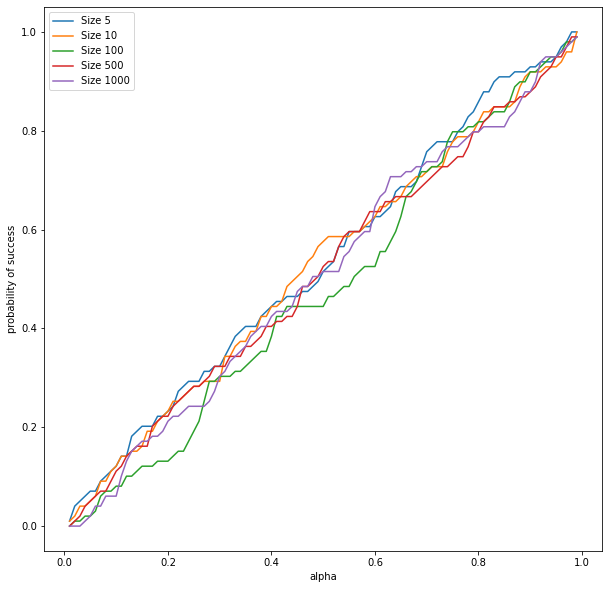

In [8]:
plt.figure(figsize=(10,10))
for n in [5, 10, 100, 500, 1000]:
    alphas = []
    probas = []
    for i in range(1, 100):
        alpha = i/100
        values = []
        for j in range(1, 100):
            data = norm.rvs(size=n, random_state=j)
            s2 = data.var()
            z1, z2 = get_confidence_interval(data, alpha)
            values.append(1 if (z1 < 1 and 1 < z2) else 0)
        alphas.append(alpha)
        probas.append(sum(values) / len(values))
    plt.plot(alphas, probas, label=f'Size {n}')
plt.xlabel('alpha')
plt.ylabel('probability of success')
plt.legend(loc="upper left")
plt.show()

_Из графика видно, что на самом деле точность определения доверительного интервала не зависит от размера выборки (это странно как-то)_

## Задача 3. 
Продемонстрируйте выполнение следующего утверждения о скорости сходимости в теореме Пуассона (Ю.В. Прохоров):
$$
\sum_{k=0}^{\infty}\left|\mathbf{P}\left(\xi_{n}=k\right)-\pi_{k}\right| \leq \frac{2 \lambda}{n} \min (2, \lambda)
$$
где $\pi_{k}=\frac{\lambda^{k} e^{-\lambda}}{k !}, k=0,1,2, \ldots$

_Напомним, что для выполнения теоремы Пуассона, вероятность успеха должна быть мала, а количество испытаний -- велико. При этом $\lambda = np$. Будем считать, что $p=0.001$(вероятность успеха), а размер выборки будем варьировать. Найдем такое значение размера выборки, при котором условие начнет выполняться._

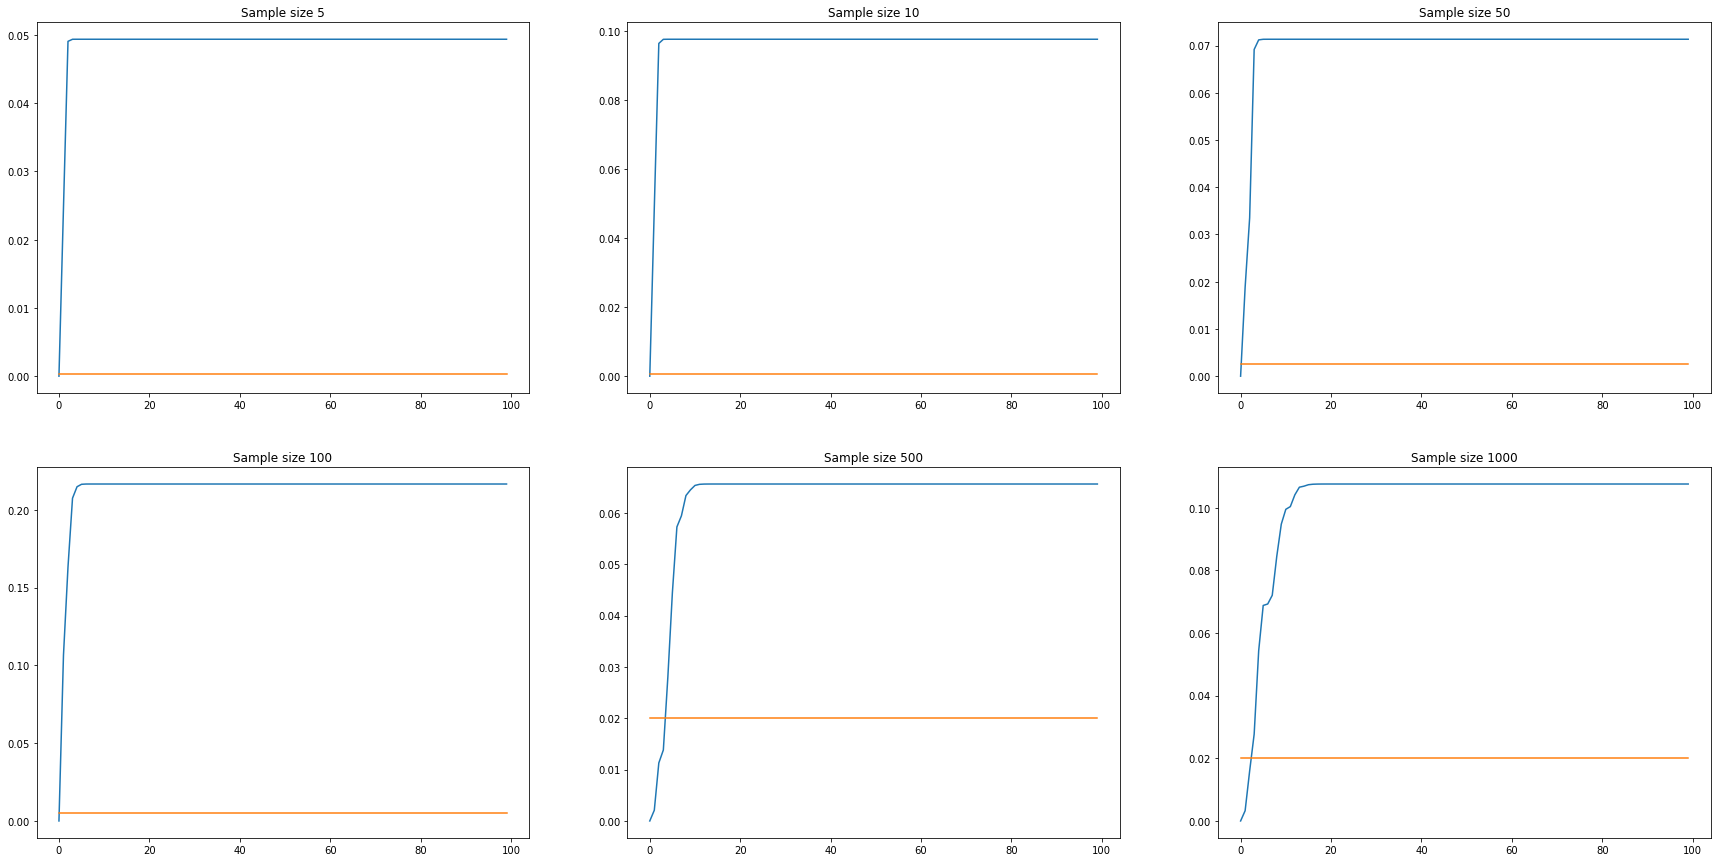

In [31]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(30,15))
axis = [ax1, ax2, ax3, ax4, ax5, ax6]

for n, ax in zip([5, 10, 50, 100, 500, 1000], axis):
    p = 0.005
    l = n * p
    values = []
    right = [2 * l / n * min(2, l) for _ in range(100)]
    data = binom.rvs(n, p, size=n)
    counts = collections.Counter(data)
    for alpha in range(100):
        seq_sum = 0
        for i in range(alpha):
            pi_k = (l ** i) * (math.e ** (-l)) / math.factorial(i)
            proba = counts[i] / len(data)
            seq_sum += abs(proba - pi_k)
        values.append(seq_sum)
    ax.set_title(f'Sample size {n}') 
    ax.plot(values)
    ax.plot(right)
plt.show()
